In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Assess ACS Data Tidiness

In [2]:
acs_07 = pd.read_csv('resources/data/ACS_07.csv')
acs_07.head()

,GEO.display-label,HD01_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,HD02_VD04,HD01_VD05,HD02_VD05,HD01_VD06,HD02_VD06,HD01_VD07,HD02_VD07,HD01_VD08,HD02_VD08,HD01_VD09,HD02_VD09,HD01_VD10,HD02_VD10
0,Alabama,4627851,3254107,5821,1212118,5691,20690,1954,44561,3209,1518,1310,34689,3695,60168,4763,5101,1570,55067,4495
1,Alaska,683478,465234,2534,25821,2172,92058,3176,32936,1975,4978,1185,15531,2952,46920,4037,1506,731,45414,3878
2,Arizona,6338755,4841990,21733,224991,5520,281096,5218,151414,3474,7701,1101,677188,21346,154375,9650,54418,5979,99957,7714
3,Arkansas,2834797,2226758,5666,442279,4286,17425,2101,33933,2991,2274,727,63856,5827,48272,4478,4287,1805,43985,3937
4,California,36553215,22026736,61328,2263363,12575,266051,10336,4511407,14112,126345,4508,6096927,64388,1262386,26412,407953,16135,854433,19033


Data is not in a tidy format - need year, estimate (HD01), margin of error (HD02), and count_type columns. 

### Clean
- Create `year` column with relevant year for file
- Modify column names for ease of use with `pd.wide_to_long()`
- Automate creation of df for files from 2007 to 2016

In [3]:
acs_07['year'] = 2007
acs_07.head()

,GEO.display-label,HD01_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,HD02_VD04,HD01_VD05,HD02_VD05,...,HD02_VD06,HD01_VD07,HD02_VD07,HD01_VD08,HD02_VD08,HD01_VD09,HD02_VD09,HD01_VD10,HD02_VD10,year
0,Alabama,4627851,3254107,5821,1212118,5691,20690,1954,44561,3209,...,1310,34689,3695,60168,4763,5101,1570,55067,4495,2007
1,Alaska,683478,465234,2534,25821,2172,92058,3176,32936,1975,...,1185,15531,2952,46920,4037,1506,731,45414,3878,2007
2,Arizona,6338755,4841990,21733,224991,5520,281096,5218,151414,3474,...,1101,677188,21346,154375,9650,54418,5979,99957,7714,2007
3,Arkansas,2834797,2226758,5666,442279,4286,17425,2101,33933,2991,...,727,63856,5827,48272,4478,4287,1805,43985,3937,2007
4,California,36553215,22026736,61328,2263363,12575,266051,10336,4511407,14112,...,4508,6096927,64388,1262386,26412,407953,16135,854433,19033,2007


In [4]:
col = list(acs_07.columns)

In [5]:
col = [name.replace('VD0', '') if name[:3] == 'HD0' else name for name in col]

In [6]:
col = [name.replace('VD', '') if name[:3] == 'HD0' else name for name in col]

In [7]:
col

['GEO.display-label',
 'HD01_1',
 'HD01_2',
 'HD02_2',
 'HD01_3',
 'HD02_3',
 'HD01_4',
 'HD02_4',
 'HD01_5',
 'HD02_5',
 'HD01_6',
 'HD02_6',
 'HD01_7',
 'HD02_7',
 'HD01_8',
 'HD02_8',
 'HD01_9',
 'HD02_9',
 'HD01_10',
 'HD02_10',
 'year']

In [8]:
acs_07.columns = col

In [9]:
df = pd.wide_to_long(acs_07, stubnames=['HD01', 'HD02'], i=['GEO.display-label', 'year'], j='count_type', sep='_').reset_index()
df.head()

,GEO.display-label,year,count_type,HD01,HD02
0,Alabama,2007,1,4627851,NaN
1,Alabama,2007,10,55067,4495.0
2,Alabama,2007,2,3254107,5821.0
3,Alabama,2007,3,1212118,5691.0
4,Alabama,2007,4,20690,1954.0


In [10]:
folder_name = 'resources/data/'
df = pd.DataFrame([], columns=df.columns)
year = 2007
for file in os.listdir(folder_name):
    if file[:3] == 'ACS':
        acs = pd.read_csv(folder_name + file)
        acs['year'] = year
        acs.columns = col
        acs = pd.wide_to_long(acs, stubnames=['HD01', 'HD02'], i=['GEO.display-label', 'year'], j='count_type', sep='_').reset_index()
        df = pd.concat([df, acs])
        year += 1

## Assess ACS Cleanliness

In [11]:
df.head()

,GEO.display-label,year,count_type,HD01,HD02
0,Alabama,2007,1,4627851,NaN
1,Alabama,2007,10,55067,4495.0
2,Alabama,2007,2,3254107,5821.0
3,Alabama,2007,3,1212118,5691.0
4,Alabama,2007,4,20690,1954.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5100 entries, 0 to 509
Data columns (total 5 columns):
GEO.display-label    5100 non-null object
year                 5100 non-null object
count_type           5100 non-null object
HD01                 5100 non-null object
HD02                 4590 non-null float64
dtypes: float64(1), object(4)
memory usage: 239.1+ KB


In [13]:
df.nunique()

GEO.display-label      51
year                   10
count_type             10
HD01                 5017
HD02                 3818
dtype: int64

In [14]:
df.year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=object)

- `count_type` should be converted to descriptive names
- Column names should be changed to more descriptive names
- `HD01` should be changed to `int`
- Need state abbreviation for joining with other data

## Clean

#### Column names
Column names should be changed to 'state_name', 'year', 'count_type', 'estimate', 'margin_of_error'

In [20]:
cols = ['state_name', 'year', 'count_type', 'estimate', 'margin_of_error']
df.columns = cols
df.head()

,state_name,year,count_type,estimate,margin_of_error
0,Alabama,2007,total,4627851,NaN
1,Alabama,2007,10,55067,4495.0
2,Alabama,2007,2,3254107,5821.0
3,Alabama,2007,3,1212118,5691.0
4,Alabama,2007,4,20690,1954.0


#### Descriptive names for `count_type`
Use `.replace()` to convert names

In [21]:
df = df.replace({
    'count_type': {
        '1': 'total',
        '2': 'white',
        '3': 'black_aa',
        '4': 'am_indian_native',
        '5': 'asian',
        '6': 'hawaiian_islander',
        '7': 'other',
        '8': 'two_or_more',
        '9': 'two_or_more_inculding_other',
        '10': 'two_or_more_exc_other_or_three_plus'
    }
})  

In [22]:
df.head()

,state_name,year,count_type,estimate,margin_of_error
0,Alabama,2007,total,4627851,NaN
1,Alabama,2007,two_or_more_exc_other_or_three_plus,55067,4495.0
2,Alabama,2007,white,3254107,5821.0
3,Alabama,2007,black_aa,1212118,5691.0
4,Alabama,2007,am_indian_native,20690,1954.0


In [23]:
df.count_type.unique()

array(['total', 'two_or_more_exc_other_or_three_plus', 'white',
       'black_aa', 'am_indian_native', 'asian', 'hawaiian_islander',
       'other', 'two_or_more', 'two_or_more_inculding_other'],
      dtype=object)

#### Convert `estimate` to `int`
Covert estimate to `int` with `.astype(int)`

In [24]:
df.estimate = df.estimate.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5100 entries, 0 to 509
Data columns (total 5 columns):
state_name         5100 non-null object
year               5100 non-null object
count_type         5100 non-null object
estimate           5100 non-null int32
margin_of_error    4590 non-null float64
dtypes: float64(1), int32(1), object(3)
memory usage: 219.1+ KB


#### Add state abbreviations
- Import state names data
- Join to df
- Drop `state_names`

In [27]:
states = pd.read_csv('resources/data/states.csv')
states.head()

,Unnamed: 0,abbr,name
0,0,AL,Alabama
1,1,AK,Alaska
2,2,AZ,Arizona
3,3,AR,Arkansas
4,4,CA,California


In [28]:
states.drop('Unnamed: 0', axis=1, inplace=True)
states.head()

,abbr,name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [36]:
states.to_csv('resources/data/states.csv', index=False)

In [29]:
df = df.merge(states, how='left', left_on='state_name', right_on='name')
df.head()

,state_name,year,count_type,estimate,margin_of_error,abbr,name
0,Alabama,2007,total,4627851,NaN,AL,Alabama
1,Alabama,2007,two_or_more_exc_other_or_three_plus,55067,4495.0,AL,Alabama
2,Alabama,2007,white,3254107,5821.0,AL,Alabama
3,Alabama,2007,black_aa,1212118,5691.0,AL,Alabama
4,Alabama,2007,am_indian_native,20690,1954.0,AL,Alabama


In [32]:
df.drop(['state_name', 'name'], axis=1, inplace=True)
df.head()

,year,count_type,estimate,margin_of_error,abbr
0,2007,total,4627851,NaN,AL
1,2007,two_or_more_exc_other_or_three_plus,55067,4495.0,AL
2,2007,white,3254107,5821.0,AL
3,2007,black_aa,1212118,5691.0,AL
4,2007,am_indian_native,20690,1954.0,AL


In [33]:
df.rename(columns={'abbr': 'state'}, inplace=True)
df.head()

,year,count_type,estimate,margin_of_error,state
0,2007,total,4627851,NaN,AL
1,2007,two_or_more_exc_other_or_three_plus,55067,4495.0,AL
2,2007,white,3254107,5821.0,AL
3,2007,black_aa,1212118,5691.0,AL
4,2007,am_indian_native,20690,1954.0,AL


In [35]:
df.to_csv('datasets/population_acs.csv', index=False)

## EDA

**Confirm the arrangement of the `count_type` categories.**

In [37]:
pop_07 = df.query('year == 2007')
pop_07.head()

,year,count_type,estimate,margin_of_error,state
0,2007,total,4627851,NaN,AL
1,2007,two_or_more_exc_other_or_three_plus,55067,4495.0,AL
2,2007,white,3254107,5821.0,AL
3,2007,black_aa,1212118,5691.0,AL
4,2007,am_indian_native,20690,1954.0,AL


In [41]:
AL_pop_07 = pop_07.query('state == "AL"')
AL_pop_07

,year,count_type,estimate,margin_of_error,state
0,2007,total,4627851,NaN,AL
1,2007,two_or_more_exc_other_or_three_plus,55067,4495.0,AL
2,2007,white,3254107,5821.0,AL
3,2007,black_aa,1212118,5691.0,AL
4,2007,am_indian_native,20690,1954.0,AL
5,2007,asian,44561,3209.0,AL
6,2007,hawaiian_islander,1518,1310.0,AL
7,2007,other,34689,3695.0,AL
8,2007,two_or_more,60168,4763.0,AL
9,2007,two_or_more_inculding_other,5101,1570.0,AL


In [42]:
AL_pop_07.estimate[1:].sum()

4688019

The sum of all other categories is more than the total, so there is some duplicate counting.

In [40]:
4688019 - 4627851

60168

In [43]:
55067 + 5101

60168

It appears that `two_or_more` is a recount combination of `two_or_more_exc_other_or_three_plus` and `two_or_more_inculding_other`.

For the purposes of this work, this breakdown does not seem critical, therefore, we will retain `two_or_more` and drop the other two in the main df.

In [57]:
df = df[(df.count_type != 'two_or_more_exc_other_or_three_plus') & \
        (df.count_type != 'two_or_more_inculding_other')]
df.head()

,year,count_type,estimate,margin_of_error,state
0,2007,total,4627851,NaN,AL
2,2007,white,3254107,5821.0,AL
3,2007,black_aa,1212118,5691.0,AL
4,2007,am_indian_native,20690,1954.0,AL
5,2007,asian,44561,3209.0,AL


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 5098
Data columns (total 5 columns):
year               4080 non-null object
count_type         4080 non-null object
estimate           4080 non-null int32
margin_of_error    3570 non-null float64
state              4000 non-null object
dtypes: float64(1), int32(1), object(3)
memory usage: 175.3+ KB


In [59]:
df.to_csv('datasets/population_acs.csv', index=False)

**Compare to Census data**

In [60]:
census_pop = pd.read_csv('datasets/population.csv')
census_pop.head()

,state,year,population
0,Alabama,2010,4785579
1,Alaska,2010,714015
2,Arizona,2010,6407002
3,Arkansas,2010,2921737
4,California,2010,37327690


In [64]:
df.query('year == 2010 & count_type == "total"').head()

,year,count_type,estimate,margin_of_error,state
1530,2010,total,4785298,NaN,AL
1540,2010,total,713985,NaN,AK
1550,2010,total,6413737,NaN,AZ
1560,2010,total,2921606,NaN,AR
1570,2010,total,37349363,NaN,CA


It appears that the ACS data is very similar to the original population data. Because the ACS data is associated with many other metrics that could be useful, it makes sense to retain this as the primary data source for population. 

It is noted that ACS data is not currently available for 2017.

### Visualisations

#### Totals

In [65]:
df = pd.read_csv('datasets/population_acs.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 5 columns):
year               4080 non-null int64
count_type         4080 non-null object
estimate           4080 non-null int64
margin_of_error    3570 non-null float64
state              4000 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 159.5+ KB


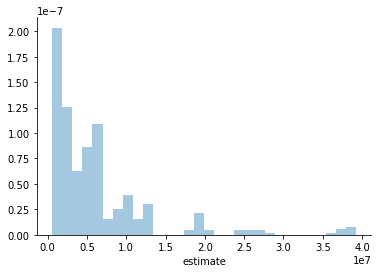

In [75]:
sns.distplot(df.query('count_type == "total"').estimate, kde=False, norm_hist=True)
sns.despine();

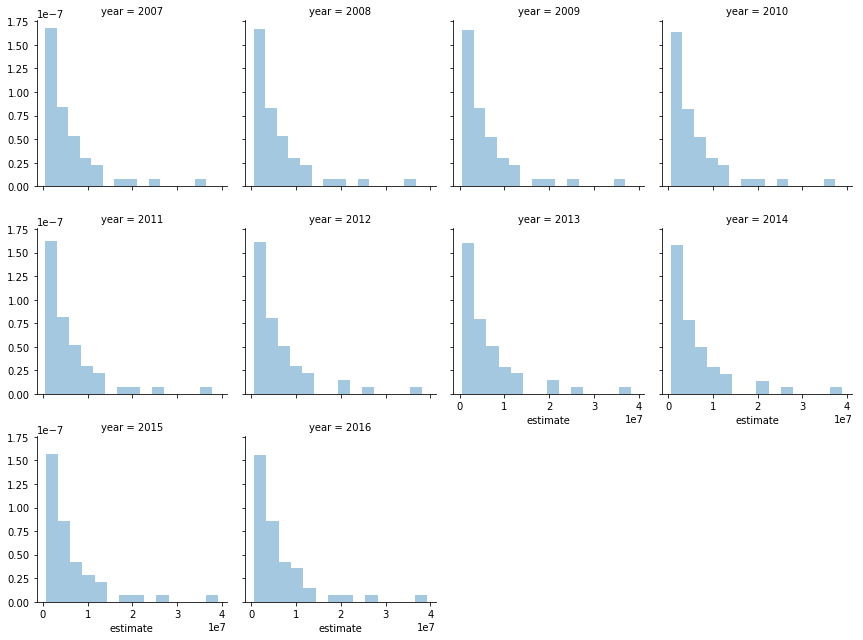

In [76]:
sns.FacetGrid(df.query('count_type == "total"'), col='year', col_wrap=4)\
.map(sns.distplot, 'estimate', norm_hist=True, kde=False);

In [77]:
totals = df.query('count_type == "total"')

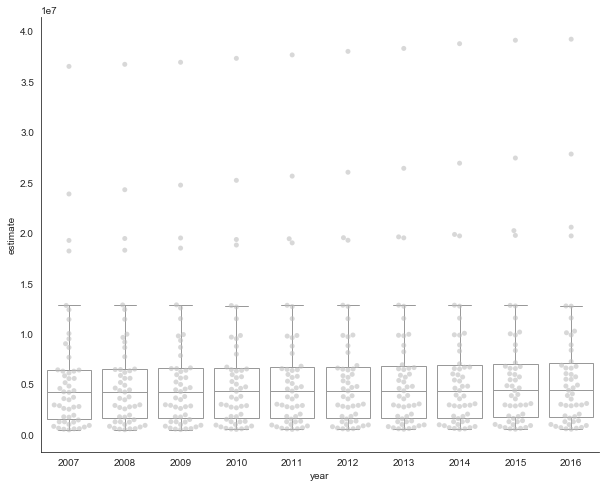

In [109]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='year', y='estimate', data=totals, color='white', linewidth=1, showfliers=False)
sns.swarmplot(x='year', y='estimate', data=totals, color='#bfbfbf', alpha=0.6);
sns.despine()
plt.savefig('datasets/plots/popluation_dist_1.png')

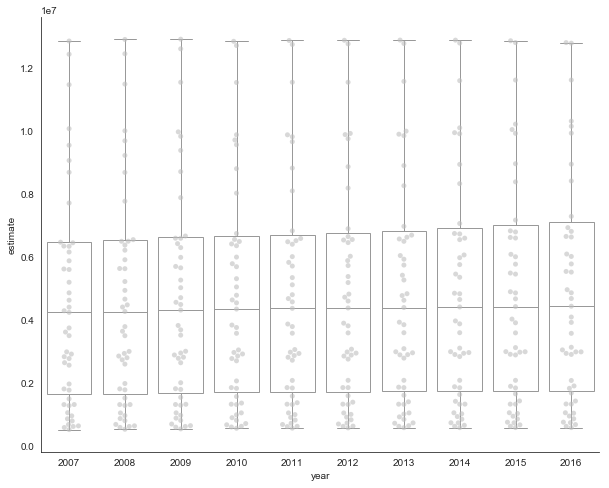

In [110]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='year', y='estimate', data=totals, color='white', linewidth=1, showfliers=False)
sns.swarmplot(x='year', y='estimate', data=totals.query('estimate < 15000000'), color='#bfbfbf', alpha=0.6);
sns.despine()
plt.savefig('datasets/plots/popluation_dist_2.png')

In [116]:
totals.groupby('year').estimate.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2007,51.0,5.914140e+06,6.672930e+06,522830.0,1636986.5,4241474.0,6459089.5,36553215.0
2008,51.0,5.961955e+06,6.724633e+06,532668.0,1653624.0,4269245.0,6524702.0,36756666.0
2009,51.0,6.019736e+06,6.780646e+06,544270.0,1671211.5,4314113.0,6629986.5,36961664.0
2010,51.0,6.065680e+06,6.841058e+06,564460.0,1700939.5,4346266.0,6650875.0,37349363.0
2011,51.0,6.109645e+06,6.907158e+06,568158.0,1713813.0,4369356.0,6708787.0,37691912.0
2012,51.0,6.155177e+06,6.974698e+06,576412.0,1725570.5,4380415.0,6771578.0,38041430.0
2013,51.0,6.198605e+06,7.035163e+06,582658.0,1733220.0,4395295.0,6832115.0,38332521.0
2014,51.0,6.252099e+06,7.124005e+06,584153.0,1742395.0,4413457.0,6903469.0,38802500.0
2015,51.0,6.302330e+06,7.201100e+06,586107.0,1749529.0,4425092.0,6999208.0,39144818.0


Part of the reason for the very linear growth is that this is an estimate. However, it can be seen that within each year the progression of points is not simply linear. 

Ranges for estimations of state populations were from approximately 522.8 thousand people to 36.6 million in 2007. In 2016 the range was from 585.5 thousand to 39.3 million. Both mean and median increased each year, as well as both the lowest state population and the highest state population for the year. 

In [88]:
totals_by_year = totals.groupby('year')['estimate'].sum().reset_index()
totals_by_year

,year,estimate
0,2007,301621159
1,2008,304059728
2,2009,307006556
3,2010,309349689
4,2011,311591919
5,2012,313914040
6,2013,316128839
7,2014,318857056
8,2015,321418821
9,2016,323127515


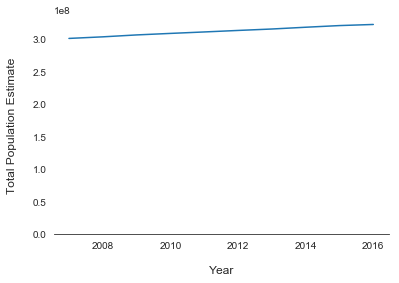

In [112]:
with sns.axes_style("white"):
    sns.lineplot(x='year', y='estimate', data=totals_by_year)
    plt.ylim(0, 335000000)
    plt.xlabel('\nYear', fontsize=12)
    plt.ylabel('Total Population Estimate\n', fontsize=12);
    sns.despine(left=True)
    plt.savefig('datasets/plots/population_change.png')

In [114]:
totals_by_year.estimate.describe()

count    1.000000e+01
mean     3.127075e+08
std      7.288905e+06
min      3.016212e+08
25%      3.075923e+08
50%      3.127530e+08
75%      3.181750e+08
max      3.231275e+08
Name: estimate, dtype: float64

Total US population has ranged from an estimated 301.6M in 2007 to 323.1M in 2016. 

In [125]:
by_state_summ = totals.groupby('state').estimate.describe()
by_state_summ

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AK,10.0,718858.6,2.216873e+04,683478.0,702351.00,727083.5,736332.00,741894.0
AL,10.0,4781389.8,8.521024e+04,4627851.0,4727855.50,4812381.5,4845463.25,4863300.0
AR,10.0,2928054.7,5.232248e+04,2834797.0,2897489.00,2943555.0,2964620.00,2988248.0
AZ,10.0,6600145.4,1.851526e+05,6338755.0,6486923.75,6574516.5,6705269.00,6931071.0
CA,10.0,37888410.6,9.854709e+05,36553215.0,37058588.75,37866671.0,38685005.25,39250017.0
CO,10.0,5180052.0,2.235609e+05,4861515.0,5030828.75,5152189.0,5333991.25,5540545.0
CT,10.0,3563007.3,3.935861e+04,3501252.0,3532829.00,3578891.0,3590751.25,3596677.0
DE,10.0,910633.6,3.009503e+04,864764.0,888783.75,912113.5,933147.75,952065.0
FL,10.0,19266585.6,8.139745e+05,18251243.0,18614308.25,19187555.0,19808187.75,20612439.0


In [126]:
by_state_summ.nlargest(4, 'max')

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
CA,10.0,37888410.6,9.854709e+05,36553215.0,37058588.75,37866671.0,38685005.25,39250017.0
TX,10.0,25874151.5,1.330016e+06,23904380.0,24901005.00,25866942.0,26829766.75,27862596.0
FL,10.0,19266585.6,8.139745e+05,18251243.0,18614308.25,19187555.0,19808187.75,20612439.0
NY,10.0,19569565.4,1.643876e+05,19297729.0,19471472.00,19555857.0,19721748.50,19795791.0


The four largest states by population are California, Texas, Florida and New York.

In [129]:
by_state_summ.nsmallest(4, 'max')

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
WY,10.0,564721.7,23422.597460,522830.0,549317.50,572285.0,583779.25,586107.0
VT,10.0,624651.4,2298.951993,621254.0,622468.50,625985.5,626333.75,626630.0
AK,10.0,718858.6,22168.728176,683478.0,702351.00,727083.5,736332.00,741894.0
ND,10.0,696385.5,46389.291143,639715.0,653757.75,691780.0,735459.75,757953.0


The four smallest states by population are Wyoming, Vermont, Alaska, and North Dakota.

In [131]:
by_state_summ['change'] = by_state_summ['max'] - by_state_summ['min']

In [146]:
by_state_summ.nlargest(6, 'change')

,count,mean,std,min,25%,50%,75%,max,change,percent_change
state,,,,,,,,,,
TX,10.0,25874151.5,1.330016e+06,23904380.0,24901005.00,25866942.0,26829766.75,27862596.0,3958216.0,0.165585
CA,10.0,37888410.6,9.854709e+05,36553215.0,37058588.75,37866671.0,38685005.25,39250017.0,2696802.0,0.073777
FL,10.0,19266585.6,8.139745e+05,18251243.0,18614308.25,19187555.0,19808187.75,20612439.0,2361196.0,0.129372
NC,10.0,9661597.6,3.568080e+05,9061032.0,9426052.50,9704237.0,9919988.00,10146788.0,1085756.0,0.119827
WA,10.0,6864467.6,2.658717e+05,6468424.0,6684270.25,6863525.0,7038999.00,7288000.0,819576.0,0.126704
GA,10.0,9912218.8,2.434286e+05,9544750.0,9738242.75,9874578.0,10071049.00,10310371.0,765621.0,0.080214


In [147]:
top_raw = totals.query('state == "TX" or state == "CA" or state == "FL" or state == "NC" or state == "WA" or state == "GA"')

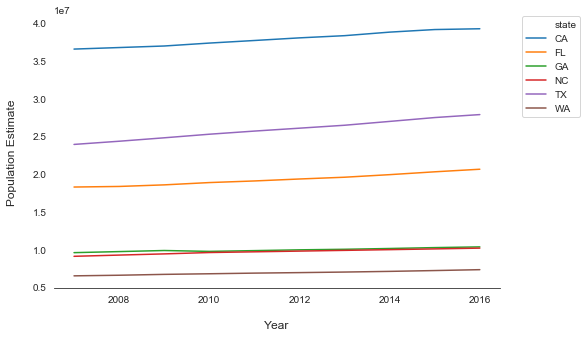

In [161]:
with sns.axes_style("white"):
    plt.subplots(figsize=(8,5))
    sns.lineplot(x='year', y='estimate', data=top_raw, hue='state')
    plt.xlabel('\nYear', fontsize=12)
    plt.ylabel('Population Estimate\n', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    sns.despine(left=True)
    plt.savefig('datasets/plots/top_raw_pop_change.png')

The six states with the highest population growth in raw numbers are Texas, California, Florida, North Carolina, Washington, and Georgia. The range of states with the greatest raw population are from around 686.4 thousand to 395.8 million.

In [149]:
by_state_summ.nsmallest(6, 'change')

,count,mean,std,min,25%,50%,75%,max,change,percent_change
state,,,,,,,,,,
VT,10.0,624651.4,2298.951993,621254.0,622468.50,625985.5,626333.75,626630.0,5376.0,0.008653
RI,10.0,1053571.7,2683.265716,1050292.0,1051354.25,1053047.5,1056016.75,1057832.0,7540.0,0.007179
ME,10.0,1325610.9,5837.724489,1316456.0,1320617.50,1328245.0,1329294.00,1331479.0,15023.0,0.011412
NH,10.0,1322755.8,6532.320785,1315809.0,1317117.75,1322088.5,1326253.50,1334795.0,18986.0,0.014429
WV,10.0,1839089.0,17984.246322,1812035.0,1822608.25,1847227.0,1854221.25,1855413.0,43378.0,0.023939
AK,10.0,718858.6,22168.728176,683478.0,702351.00,727083.5,736332.00,741894.0,58416.0,0.085469


In [150]:
bot_raw = totals.query('state == "VT" or state == "RI" or state == "FL" or state == "NC" or state == "WV" or state == "AK"')

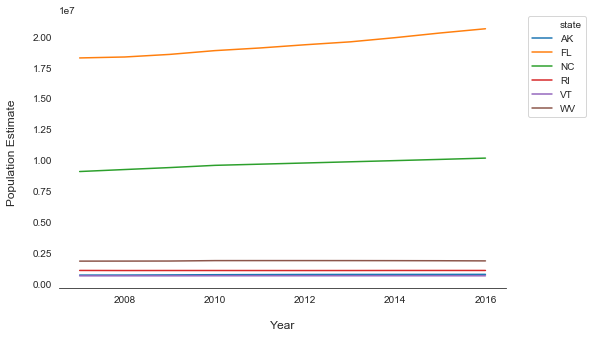

In [162]:
with sns.axes_style("white"):
    plt.subplots(figsize=(8,5))
    sns.lineplot(x='year', y='estimate', data=bot_raw, hue='state')
    plt.xlabel('\nYear', fontsize=12)
    plt.ylabel('Population Estimate\n', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    sns.despine(left=True)
    plt.savefig('datasets/plots/bot_raw_pop_change.png')

The six states with the lowest population growth in raw numbers are Vermont, Rhode Island, Maine, New Hampshire, West Virgina, and Alaska. The range of states with the least raw population are from 621.2 thousand to 1.85 million.

In [135]:
by_state_summ['percent_change'] = by_state_summ['change'] / by_state_summ['min']

In [154]:
by_state_summ.nlargest(6, 'percent_change')

,count,mean,std,min,25%,50%,75%,max,change,percent_change
state,,,,,,,,,,
ND,10.0,696385.5,4.638929e+04,639715.0,653757.75,691780.0,735459.75,757953.0,118238.0,0.184829
TX,10.0,25874151.5,1.330016e+06,23904380.0,24901005.00,25866942.0,26829766.75,27862596.0,3958216.0,0.165585
UT,10.0,2850621.4,1.240855e+05,2645330.0,2778494.75,2836254.5,2932394.50,3051217.0,405887.0,0.153435
NV,10.0,2745566.7,1.229841e+05,2565382.0,2658474.25,2741126.5,2826858.25,2940058.0,374676.0,0.146051
CO,10.0,5180052.0,2.235609e+05,4861515.0,5030828.75,5152189.0,5333991.25,5540545.0,679030.0,0.139675
FL,10.0,19266585.6,8.139745e+05,18251243.0,18614308.25,19187555.0,19808187.75,20612439.0,2361196.0,0.129372


In [156]:
top_percent = totals.query('state == "ND" or state == "TX" or state == "UT" or state == "NV" or state == "CO" or state == "FL"')

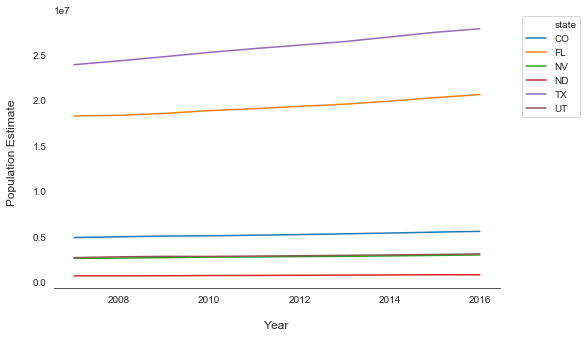

In [163]:
with sns.axes_style("white"):
    plt.subplots(figsize=(8,5))
    sns.lineplot(x='year', y='estimate', data=top_percent, hue='state')
    plt.xlabel('\nYear', fontsize=12)
    plt.ylabel('Population Estimate\n', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    sns.despine(left=True)
    plt.savefig('datasets/plots/top_percent_pop_change.png')

The states with the largest population growth by percentage of population in 2007 are North Dakota, Texas, Utah, Nevada, Colorado, and Florida. The range of the populations of these states is from 256.5 thousand to 2.79 million. These ranged from 12.9% to 18.5% increases.

In [158]:
by_state_summ.nsmallest(6, 'percent_change')

,count,mean,std,min,25%,50%,75%,max,change,percent_change
state,,,,,,,,,,
RI,10.0,1053571.7,2683.265716,1050292.0,1051354.25,1053047.5,1056016.75,1057832.0,7540.0,0.007179
IL,10.0,12867645.0,31042.473169,12801539.0,12854409.75,12872257.0,12881746.25,12910409.0,108870.0,0.008504
VT,10.0,624651.4,2298.951993,621254.0,622468.50,625985.5,626333.75,626630.0,5376.0,0.008653
ME,10.0,1325610.9,5837.724489,1316456.0,1320617.50,1328245.0,1329294.00,1331479.0,15023.0,0.011412
OH,10.0,11551359.7,49267.303575,11466917.0,11537797.75,11544588.0,11588324.25,11614373.0,147456.0,0.012859
NH,10.0,1322755.8,6532.320785,1315809.0,1317117.75,1322088.5,1326253.50,1334795.0,18986.0,0.014429


In [159]:
bot_percent = totals.query('state == "RI" or state == "IL" or state == "VT" or state == "ME" or state == "OH" or state == "NH"')

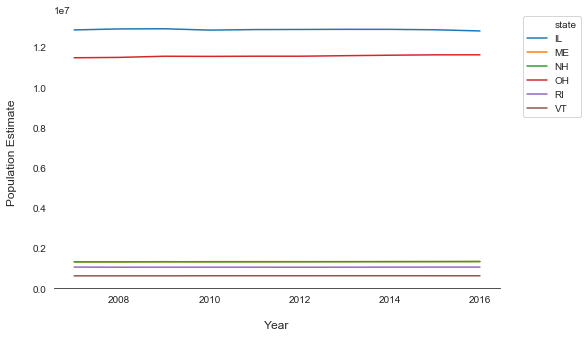

In [164]:
with sns.axes_style("white"):
    plt.subplots(figsize=(8,5))
    sns.lineplot(x='year', y='estimate', data=bot_percent, hue='state')
    plt.xlabel('\nYear', fontsize=12)
    plt.ylabel('Population Estimate\n', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    sns.despine(left=True)
    plt.savefig('datasets/plots/bot_percent_pop_change.png')

The states with the smallest population growth by percentage of population in 2007 are Rhode Island, Illinios, Vermont, Maine, Ohio, and New Hampshire. The range of the populations of these states is from 621.2 thousand to 1.29 million. These ranged from 0.7% to 1.4% increases.